In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

# Шаг 1: Импорт набора данных
# Замените 'your_dataset.csv' на реальное имя вашего файла с данными
data = pd.read_csv('D:\\Sigmoid home_task\\task_9\\bodyPerformance1.csv')
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


C:\Users\jija0\AppData\Local\Temp\ipykernel_27048\2380729724.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
data['class'].value_counts()

class
C    3349
D    3349
A    3348
B    3347
Name: count, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
# Список категориальных признаков
categorical_features = ['gender', 'class']

# Преобразование категориальных признаков в числовую форму и замена значений в DataFrame
label_encoder = LabelEncoder()
for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])

In [6]:
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1


In [7]:
# Шаг 2: Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop('class', axis=1)  # Замените 'target_column' на реальное имя целевой переменной
y = data['class']
# Разделение на обучающий и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##1. Initial one (Исходные данные):
   - Это исходные, необработанные данные, как они поступили из источника.
   - Значения признаков могут иметь разный масштаб, и это может повлиять на производительность некоторых алгоритмов машинного обучения, таких как SVM, который часто чувствителен к различиям в масштабе признаков.

##2. The one passed through the StandardScaler:
   - StandardScaler стандартизирует (масштабирует) данные путем центрирования вокруг среднего значения и деления на стандартное отклонение.
   - Этот метод преобразует данные так, что они имеют стандартное нормальное распределение со средним значением 0 и стандартным отклонением 1.
   - Формула для стандартизации: z = (x - mean) / std

##3. The one passed through the MinMaxScaler:
   - MinMaxScaler масштабирует данные так, чтобы они находились в заданном диапазоне, обычно [0, 1].
   - Этот метод сохраняет относительные пропорции значений признаков, приводя их к интервалу от 0 до 1.
   - Формула для масштабирования: x_scaled = (x - min) / (max - min)

##4. The one passed through the MaxAbsScaler:
   - MaxAbsScaler масштабирует каждый признак по его максимальному абсолютному значению.
   - Этот метод сохраняет относительные пропорции данных, но не центрирует их вокруг среднего значения.
   - Формула для масштабирования: x_scaled = x / max_abs

In [8]:

svm_models = {}
model_name = []
model_accuracy = []
# Обучение SVM модели на 4 версиях данных

# Модель на исходных данных
svm_model_initial = SVC()
svm_model_initial.fit(X_train, y_train)
accuracy_initial = svm_model_initial.score(X_test, y_test)
print("Accuracy on initial data:", accuracy_initial)
model_name.append('Initial')
model_accuracy.append(accuracy_initial)

# Масштабирование данных с использованием StandardScaler
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

svm_model_standard = SVC()
svm_model_standard.fit(X_train_standard, y_train)
accuracy_standard = svm_model_standard.score(X_test_standard, y_test)
print("Accuracy on StandardScaler data:", accuracy_standard)
model_name.append('StandardScaler')
model_accuracy.append(accuracy_standard)



# Масштабирование данных с использованием MinMaxScaler
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

svm_model_minmax = SVC()
svm_model_minmax.fit(X_train_minmax, y_train)
accuracy_minmax = svm_model_minmax.score(X_test_minmax, y_test)
print("Accuracy on MinMaxScaler data:", accuracy_minmax)

model_name.append('MinMaxScaler')
model_accuracy.append(accuracy_minmax)

# Масштабирование данных с использованием MaxAbsScaler
scaler_maxabs = MaxAbsScaler()
X_train_maxabs = scaler_maxabs.fit_transform(X_train)
X_test_maxabs = scaler_maxabs.transform(X_test)

svm_model_maxabs = SVC()
svm_model_maxabs.fit(X_train_maxabs, y_train)
accuracy_maxabs = svm_model_maxabs.score(X_test_maxabs, y_test)
print("Accuracy on MaxAbsScaler data:", accuracy_maxabs)

model_name.append('MaxAbsScaler')
model_accuracy.append(accuracy_maxabs)

print()

Accuracy on initial data: 0.6043299738708473
Accuracy on StandardScaler data: 0.6991414706980217
Accuracy on MinMaxScaler data: 0.6420306084359836
Accuracy on MaxAbsScaler data: 0.6550951847704367



In [9]:
# Создание DataFrame из двух списков
df = pd.DataFrame({'Model': model_name, 'Accuracy': model_accuracy})

# Вывод DataFrame
print(df)

            Model  Accuracy
0         Initial  0.604330
1  StandardScaler  0.699141
2    MinMaxScaler  0.642031
3    MaxAbsScaler  0.655095


Лучшие результаты в нашем случае получились у StandardScaler

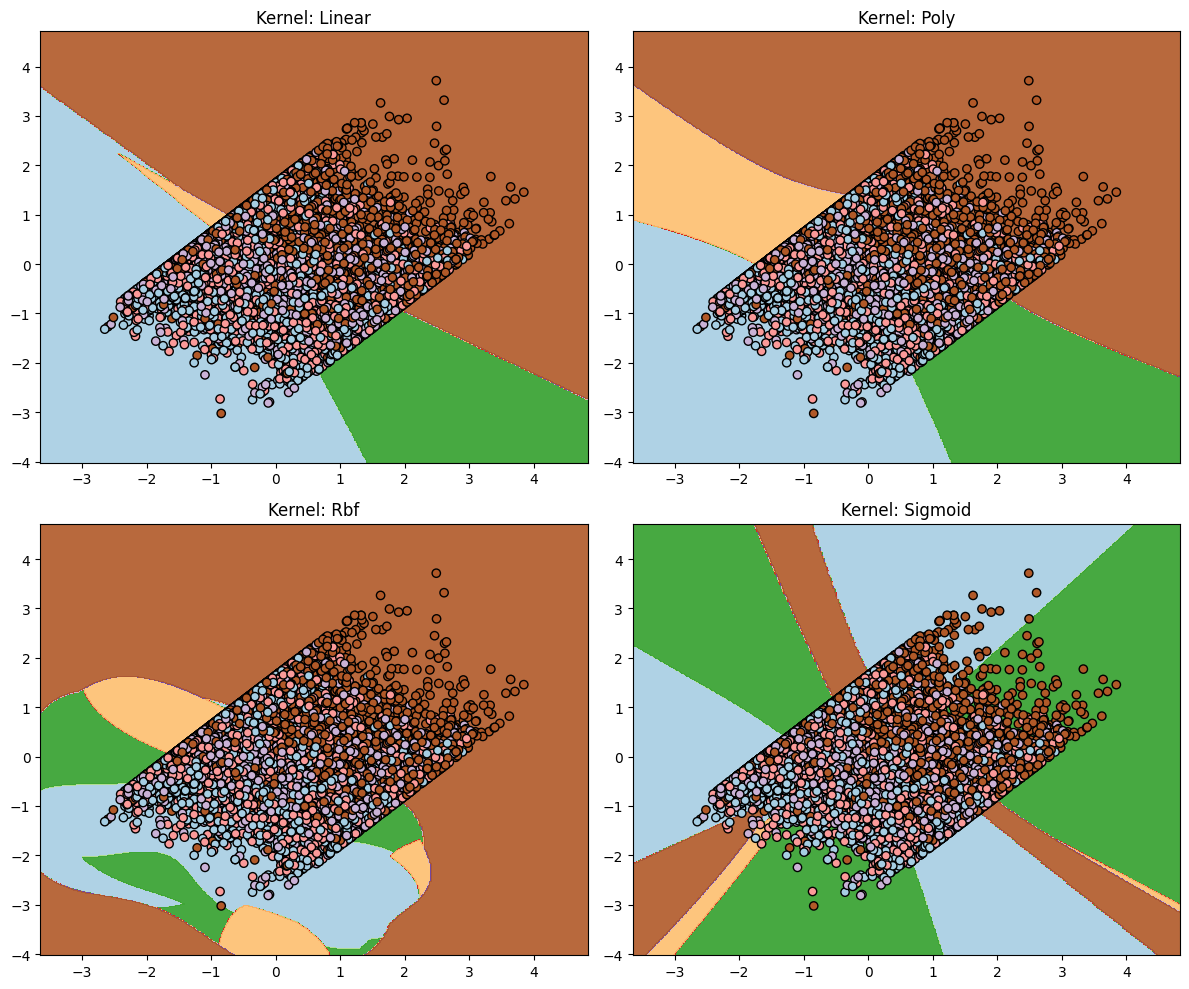

In [26]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

import numpy as np
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Kernels to explore
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, kernel in enumerate(kernels):
    # Train SVM model with different kernels
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train_pca, y_train)

    # Plot decision boundary
    ax = axes[i // 2, i % 2]

    h = .02  # step size in the mesh
    x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
    y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.9)
    ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', marker='o')

    ax.set_title(f'Kernel: {kernel.capitalize()}')

plt.tight_layout()
plt.show()